<a href="https://colab.research.google.com/github/Subhajit53/NYC-Taxi-Trip-Time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_Colab_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

# **Introduction :**
##### In this era of hussle and bustle, everyone wants to save some time from their daily life. And for the people who wants to save some time for their relaxation or important meeting or a football match, road journeys are the main obstacles. In New York City, on an average, people spend around 54 minutes in public transports daily, and 55% among them spend above 2 hours. Average waiting time for public transports is around 13 minutes in New York City.
##### And here comes a scenario where this average time for arrival to destination is very important. Say, somebody has a very important meeting from 11 AM and he lives around 2 KMs away from his office. Now, he has to know how he should plan his journey (whether take a walk or taxi) and when he should get out from his home etc. That's why getting an estimate of EDA time is important is many situations.
##### Nowadays people can get that information from Google Maps or some online taxi service provider they are using.
##### Here, I want to model that EDA time using some supervised ML models and try to get an idea of how Google, OLA, Uber etc provide those EDA times.

# **Approach :**
##### To solve the problem, I have devised a 4-step approach below:

#### **1. Basic EDA :**
##### In this step, I want to do some exploration on the data. First, I shall check for null values and try to replace or remove them. Then, I shall check for outliers using boxplots and try to replace or remove them. Thirdly, I shall get some visualizations to get an idea of the varibales in hand.

#### **2. Feature Engineering :**
##### In this second step, I want come up with some features using the existing ones which might be better in explaining my dependent variable 'trip_duration'. And I shall plot a correlation heatmap to evaluate the relationship between variables. Also, I shall do some EDA on newly made variables and do some anomaly detection to make the model more robust.

#### **3. Model training :**
##### In this step, I shall get a train-test pair from the given dataset and fit 4 regression models to the train set. The models are namely : Linear Regression, Random Forests, Gradient Boosting Machine, Support Vector Machines.

#### **4. Model testing**
##### As the last step, I shall evaluate all the models and try to come up with a conclusion about which model might be the best choice here.

# **Analysis:**

### **Data Exporting and exploration :**

In [ ]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopy.distance

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the dataset
taxi_df = pd.read_csv('/content/drive/MyDrive/NYC Taxi Trip Time Prediction - Subhajit Ganguly/NYC Taxi Data.csv', index_col = 'id')

In [ ]:
# Having a glance at the dataset
taxi_df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
# Getting the shape of the dataset
taxi_df.shape

(1458644, 10)

In [ ]:
# Getting an info of the dataset
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458644 entries, id2875421 to id1209952
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1458644 non-null  int64  
 1   pickup_datetime     1458644 non-null  object 
 2   dropoff_datetime    1458644 non-null  object 
 3   passenger_count     1458644 non-null  int64  
 4   pickup_longitude    1458644 non-null  float64
 5   pickup_latitude     1458644 non-null  float64
 6   dropoff_longitude   1458644 non-null  float64
 7   dropoff_latitude    1458644 non-null  float64
 8   store_and_fwd_flag  1458644 non-null  object 
 9   trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 122.4+ MB


## **1. Basic EDA :**

From the above info table and shape, it is clear that there are no null values present in the dataset. There goes a huge burden from my shoulders! Now, let's analyze further.

In [ ]:
# Changing data type of datetimes
taxi_df['pickup_datetime'] = pd.to_datetime(taxi_df['pickup_datetime'])
taxi_df['dropoff_datetime'] = pd.to_datetime(taxi_df['dropoff_datetime'])

In [ ]:
# Getting a description of all the variables
taxi_df.describe(include = 'all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,1.458644e+06,1458644,1458644,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1458644,1.458644e+06
unique,NaN,1380222,1380377,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,2016-03-04 08:07:34,2016-05-16 19:40:28,NaN,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,5,5,NaN,NaN,NaN,NaN,NaN,1450599,NaN
first,NaN,2016-01-01 00:00:17,2016-01-01 00:03:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2016-06-30 23:59:39,2016-07-01 23:02:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.534950e+00,NaN,NaN,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,NaN,9.594923e+02
std,4.987772e-01,NaN,NaN,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,NaN,5.237432e+03
min,1.000000e+00,NaN,NaN,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,NaN,1.000000e+00
25%,1.000000e+00,NaN,NaN,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,NaN,3.970000e+02


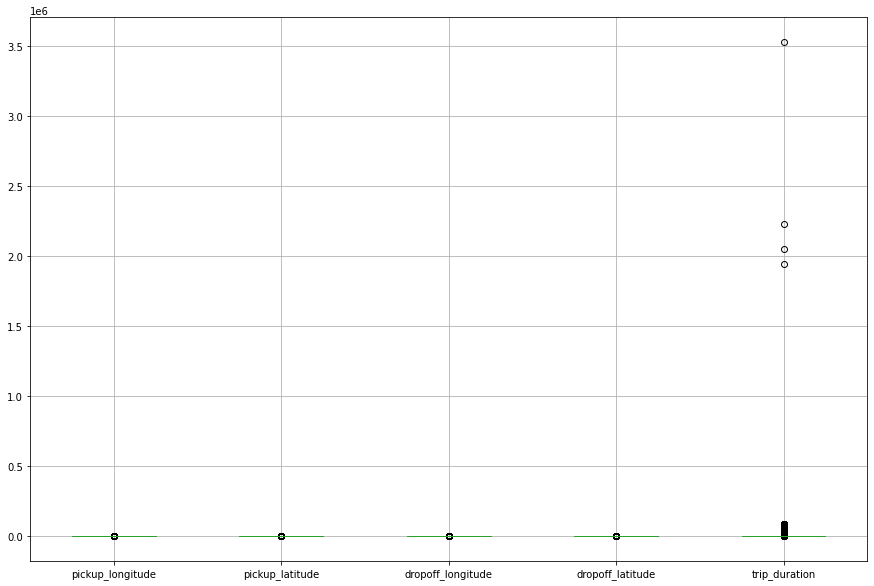

In [ ]:
# Plot a boxplot to get an idea of absurd values
plt.figure(figsize=(15,10))
taxi_df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_duration']].boxplot()

We can see that there are no visible and distant outliers in the dataset except for trip_duration which is our dependent variable. Let's have a look at those 4 data points. 

In [ ]:
# Sorting the dataset according to trip_duration
taxi_df.sort_values(by = ['trip_duration'], axis = 0, ascending = False)[:4]

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282
id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,2227612
id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,2049578
id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,1939736


We can see that those 4 values are in millions! Maybe they are of some out of the town and long journeys which are not part of normal routings. I have no hesitation to remove them!

In [ ]:
# Deleting the rows with top 4 trip duration
taxi_df = taxi_df.sort_values(by = ['trip_duration'], axis = 0, ascending = False)[4:]

In [ ]:
taxi_df[['trip_duration']].describe()

,trip_duration
count,1.458640e+06
mean,9.528153e+02
std,3.171322e+03
min,1.000000e+00
25%,3.970000e+02
50%,6.620000e+02
75%,1.075000e+03
max,8.639200e+04


This one lookes pretty good now! Now, let's check if there are some very low trip durations.

In [ ]:
# Getting rows with trip duration less than 1 minute
taxi_df[taxi_df['trip_duration'] <= 60]

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id1094398,2,2016-01-06 21:03:52,2016-01-06 21:04:52,1,-73.965988,40.762531,-73.962082,40.767712,N,60
id3745181,1,2016-01-18 23:01:11,2016-01-18 23:02:11,1,-73.947685,40.778572,-73.950653,40.779911,N,60
id2303511,1,2016-01-22 01:16:28,2016-01-22 01:17:28,1,-73.964157,40.807880,-73.966515,40.804478,N,60
id0941804,2,2016-03-15 18:51:19,2016-03-15 18:52:19,1,-74.001160,40.751999,-73.997276,40.755501,N,60
id2064163,1,2016-02-14 13:05:59,2016-02-14 13:06:59,1,-73.948608,40.782478,-73.953705,40.784546,N,60
...,...,...,...,...,...,...,...,...,...,...
id0553321,2,2016-04-11 19:01:35,2016-04-11 19:01:36,1,-73.945999,40.792202,-73.947411,40.792740,N,1
id0008221,2,2016-05-16 14:42:18,2016-05-16 14:42:19,1,-73.787086,40.647388,-73.789780,40.646992,N,1
id3563137,2,2016-04-15 17:32:22,2016-04-15 17:32:23,1,-73.782417,40.644154,-73.782433,40.644169,N,1


Okay, now this one looks like some errorenous inputs have been given. We can see that the person has travelled with respect to long-lat but his/her trip time was somehow inputted as 1 errorenously. Even there are some durations less than 60 seconds. I mean no one can just get into a taxi and get out of it in a minute, right? I shall not remove them now but see what I can do with some anomaly detection.

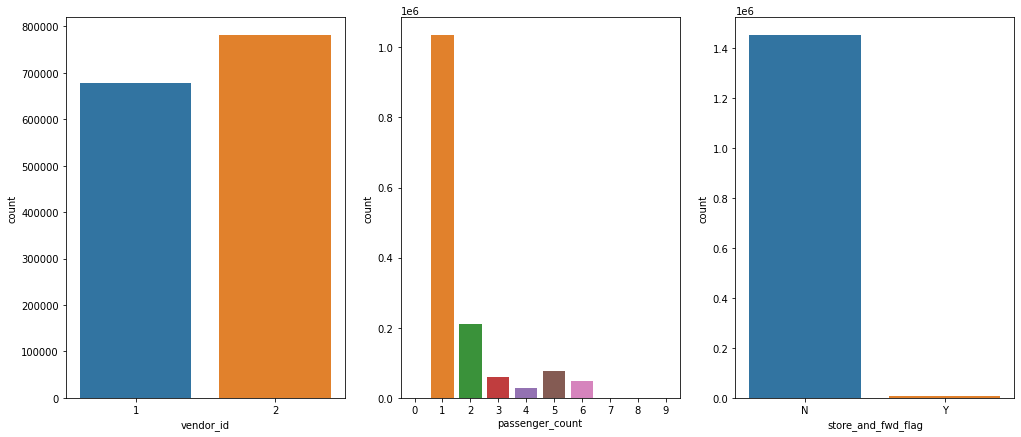

In [ ]:
# Plotting barplots for categorical columns
plt.figure(figsize=(17,7))

plt.subplot(1,3,1)
sns.countplot(data = taxi_df, x = 'vendor_id')

plt.subplot(1,3,2)
sns.countplot(data = taxi_df, x = 'passenger_count')

plt.subplot(1,3,3)
sns.countplot(data = taxi_df, x = 'store_and_fwd_flag')

There are a few conclusions to make here:
*   Vendor id 2 gets most trips
*   Passengers are more likely to travel solo.
*   Taxis with more than 6 passengers are rare.
*   There are some entries which have 0 passengers.
*   Most of the trips were not held in vehicle memory.



We can delete taxis with 7,8,9 passengers as they are minuscule in frequency. I shall remove them. Also I shall remove the rows with 0 passengers.

In [ ]:
# Getting rows with less than or equal to 6 passenger count
taxi_df = taxi_df[taxi_df['passenger_count'] <= 6]

In [ ]:
# Deleting rows with 0 passenger count
taxi_df = taxi_df[taxi_df['passenger_count'] != 0]

And with that, our basic EDA is completed. Now, let's do some feature engineering and come up with some interesting features.

# **2. Feature Engineering :**

### **1. Creating variables for pickup and dropoff times :**

In [ ]:
# Extracting hours from pickup and dropoff datetime
taxi_df['pickup_hour'] = taxi_df['pickup_datetime'].dt.hour
taxi_df['dropoff_hour'] = taxi_df['dropoff_datetime'].dt.hour

In [ ]:
# Extracting days from pickup and dropoff datetime
taxi_df['pickup_day'] = taxi_df['pickup_datetime'].dt.day_name()
taxi_df['dropoff_day'] = taxi_df['dropoff_datetime'].dt.day_name()

In [ ]:
# Extracting months from pickup and dropoff datetime
taxi_df['pickup_month'] = taxi_df['pickup_datetime'].dt.month
taxi_df['dropoff_month'] = taxi_df['dropoff_datetime'].dt.month

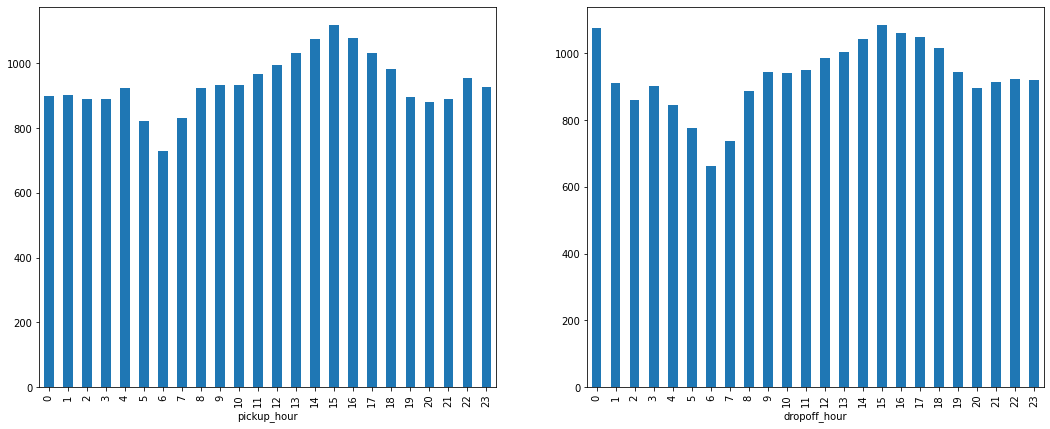

In [ ]:
# Now let's see how the average trip duration changes during the day
plt.figure(figsize = (18,7))
plt.subplot(1,2,1)
taxi_df.groupby('pickup_hour')['trip_duration'].mean().plot(kind = 'bar')
plt.subplot(1,2,2)
taxi_df.groupby('dropoff_hour')['trip_duration'].mean().plot(kind = 'bar')

We can see that average trip duration is higher during 10AM-7PM. That's the rush hour in any city and it is obvious.


In [ ]:
# Dropping the pickup and dropoff datetime columns
taxi_df.drop(['pickup_datetime', 'dropoff_datetime'], axis = 1, inplace = True)

Now, let's have a look at the correlation heatmap

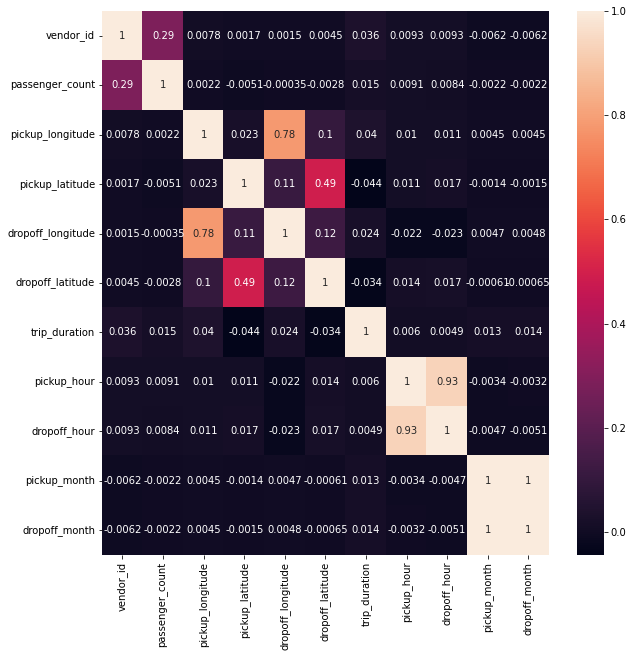

In [ ]:
# Plotting correlation heatmap
corrmat = taxi_df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corrmat, annot = True)

It is evident from the above heatmap that pickup and dropoff longitude & pickup and dropoff latitude are highly correlated. Here, we can combine them by calculating the distance between those points and introduce a new variable.

### **2. Distance between pickup and dropoff locations :**

In [ ]:
# Introducing a new column to store geo distance between pickup and dropoff locations (in kms)
def f(row):
    try:
        return geopy.distance.geodesic((row['pickup_latitude'], row['pickup_longitude']), 
                                       (row['dropoff_latitude'], row['dropoff_longitude'])).km
    except:
         return 0

taxi_df['distance'] = taxi_df.apply(f, axis=1)

In [ ]:
# Dropping the longitude latitude columns
taxi_df.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis = 1, inplace = True)

In [ ]:
# Now, let's have a look at our modified dataset
taxi_df.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,pickup_hour,dropoff_hour,pickup_day,dropoff_day,pickup_month,dropoff_month,distance
id,,,,,,,,,,,
id1942836,2,2,N,86392,23,23,Monday,Tuesday,2,2,20.666941
id0593332,2,1,N,86391,13,13,Tuesday,Wednesday,5,6,21.147722
id0953667,2,1,N,86390,0,0,Friday,Saturday,5,5,2.005244
id2837671,2,1,N,86387,16,16,Thursday,Friday,6,7,6.199703
id1358458,2,1,N,86385,16,16,Thursday,Friday,6,6,17.335134


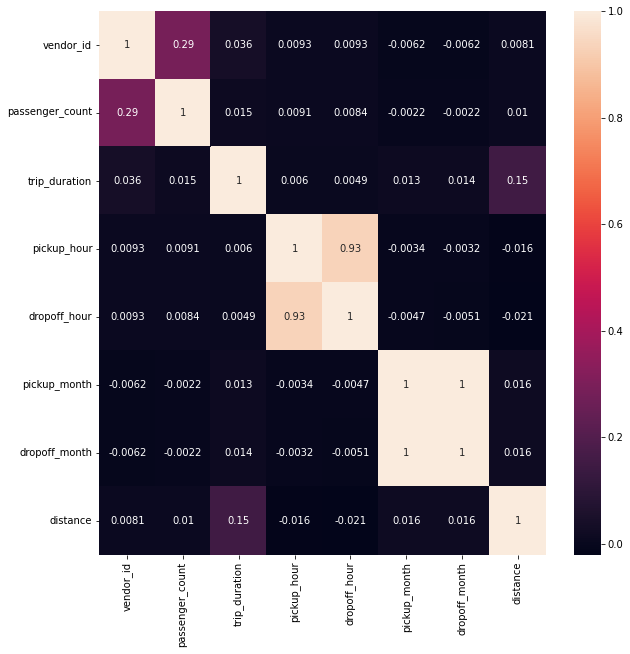

In [ ]:
# Plotting correlation heatmap
corrmat_1 = taxi_df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corrmat_1, annot = True)

### **3. Introducing Speed :**

Let's introduce another feature for trip duration, represented in hours and average speed of the vehicle. The formal column will not be used in ML algorithms, but it will help us in detecting some anomalies.

In [ ]:
# Introducing trip duration in hours
taxi_df['trip_duration_hour'] = taxi_df['trip_duration']/3600

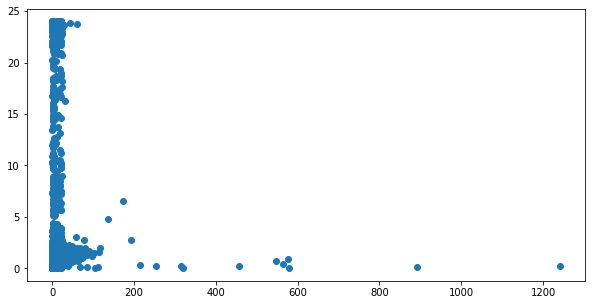

In [ ]:
# Plotting distance vs trip duration in hours scatter plot
plt.figure(figsize = (10,5))
plt.scatter(data = taxi_df, x = 'distance', y = 'trip_duration_hour')

We can see that there are some outliers here, and also there are some 0 distances. I am going to replace the 0 distances with mean distances.

In [ ]:
# Replacing 0 distances with mean distances
mean_dist=taxi_df['distance'].mean()
taxi_df.loc[taxi_df['distance']==0,'distance']=mean_dist

In [ ]:
# Introducing speed
taxi_df['speed'] = taxi_df['distance']/taxi_df['trip_duration_hour']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


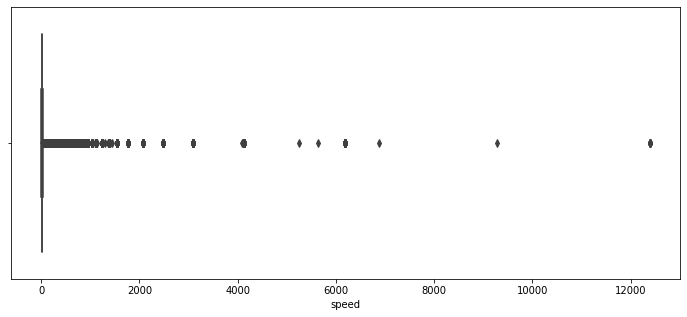

In [ ]:
plt.figure(figsize = (12,5))
sns.boxplot(taxi_df['speed'])

In [ ]:
# Dropping rows with speed more than 100 or less than 1
taxi_df = taxi_df[(taxi_df['speed']<100) & (taxi_df['speed']>1)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


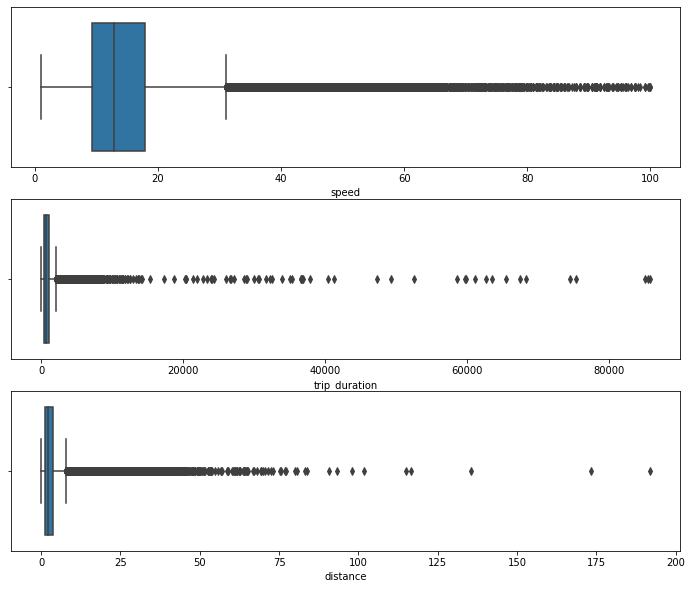

In [ ]:
# Boxplots of speed, trip duration and distance
plt.figure(figsize = (12,10))

plt.subplot(3,1,1)
sns.boxplot(taxi_df['speed'])

plt.subplot(3,1,2)
sns.boxplot(taxi_df['trip_duration'])

plt.subplot(3,1,3)
sns.boxplot(taxi_df['distance'])

Although the boxplot of speed shows that there are many outliers, I don't think I should remove them as they are highly congested and might hold some useful information. And cabs can drive upto 100kms/hr, right?

##### But I shall remove some of the trip durations and distances as some of the values are way too higher than the normal range.

In [ ]:
# Removing rows with more than 40000 seconds trip duration
taxi_df = taxi_df[taxi_df['trip_duration']<40000]

In [ ]:
# Removing rows with more than 100 kms distance
taxi_df = taxi_df[taxi_df['distance']<=100]

In [ ]:
# Let's have a look a the dataset again
taxi_df.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,pickup_hour,dropoff_hour,pickup_day,dropoff_day,pickup_month,dropoff_month,distance,trip_duration_hour,speed
id,,,,,,,,,,,,,
id2441051,2,2,N,37856,13,0,Sunday,Monday,6,6,18.163160,10.515556,1.727266
id2447340,2,1,N,36949,13,0,Friday,Saturday,2,2,21.155170,10.263611,2.061182
id3479290,2,1,N,36784,13,0,Sunday,Monday,5,5,19.947589,10.217778,1.952243
id2554537,2,2,N,36628,13,0,Thursday,Friday,2,2,21.167543,10.174444,2.080462
id2744593,2,1,N,36594,13,0,Tuesday,Wednesday,5,6,20.703266,10.165000,2.036721


Now, it seems that most of our abnormal values are gone. Still, I shall run an Isolation Forest algorithm to make sure that I get rid of abnormal values. Further addition, I shall first do one-hot encoding of categorical columns as Isolation forest algorithm can't process categorical features directly. It will help me in modeling too. And post that, I shall check whether the trip durations below 1 minute are gone or not.

In [ ]:
# Changing data types of categorical features
taxi_df['vendor_id'] = taxi_df['vendor_id'].astype(object)
taxi_df['passenger_count'] = taxi_df['passenger_count'].astype(object)

In [ ]:
# Getting dummies
taxi_df_model = pd.get_dummies(taxi_df)

In [ ]:
# Now, let's see how the data looks like
taxi_df_model.head()

,trip_duration,pickup_hour,dropoff_hour,pickup_month,dropoff_month,distance,trip_duration_hour,speed,vendor_id_1,vendor_id_2,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_day_Friday,pickup_day_Monday,pickup_day_Saturday,pickup_day_Sunday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,dropoff_day_Friday,dropoff_day_Monday,dropoff_day_Saturday,dropoff_day_Sunday,dropoff_day_Thursday,dropoff_day_Tuesday,dropoff_day_Wednesday
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
id2441051,37856,13,0,6,6,18.163160,10.515556,1.727266,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
id2447340,36949,13,0,2,2,21.155170,10.263611,2.061182,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
id3479290,36784,13,0,5,5,19.947589,10.217778,1.952243,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
id2554537,36628,13,0,2,2,21.167543,10.174444,2.080462,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
id2744593,36594,13,0,5,6,20.703266,10.165000,2.036721,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
taxi_df_model.shape

(1449110, 32)

In [ ]:
# Deleting further anomalies using Isolation Forest
from sklearn.ensemble import IsolationForest
model=IsolationForest(n_estimators=50,max_samples='auto',contamination=0.01,random_state=123,max_features=5)
model.fit(taxi_df_model)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.01, max_features=5, n_estimators=50,
                random_state=123)

In [ ]:
# Assigning anomaly tags to observations
taxi_df_model['Anomaly'] = model.predict(taxi_df_model)
taxi_df_model.Anomaly.value_counts()

 1    1434619
-1      14491
Name: Anomaly, dtype: int64

In [ ]:
# Taking non-anomalous observations only
taxi_df_model = taxi_df_model[taxi_df_model['Anomaly'] == 1]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


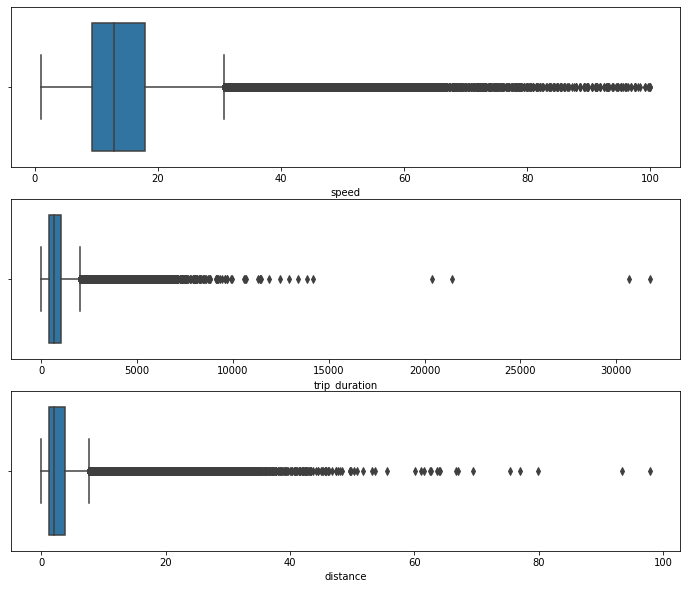

In [ ]:
# Boxplots of speed, trip duration and distance after anomaly removal
plt.figure(figsize = (12,10))

plt.subplot(3,1,1)
sns.boxplot(taxi_df_model['speed'])

plt.subplot(3,1,2)
sns.boxplot(taxi_df_model['trip_duration'])

plt.subplot(3,1,3)
sns.boxplot(taxi_df_model['distance'])

Ah! Those tiny dots in trip duration and distance! It seems I have to manually remove them and proceed.

In [ ]:
# Further delete trips with duration more than 10000 seconds and distances more than 40 kms
taxi_df_model = taxi_df_model[taxi_df_model['trip_duration'] < 10000]
taxi_df_model = taxi_df_model[taxi_df_model['distance'] < 60]

Let's also check if the rows with trip duration less than 1 minute had been removed or not. If not, then let's remove them.

In [ ]:
taxi_df_model[taxi_df_model['trip_duration'] <= 60].shape

(5267, 33)

In [ ]:
# Removing trip durations with less than 1 minute duration
taxi_df_model = taxi_df_model[taxi_df_model['trip_duration'] > 60]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


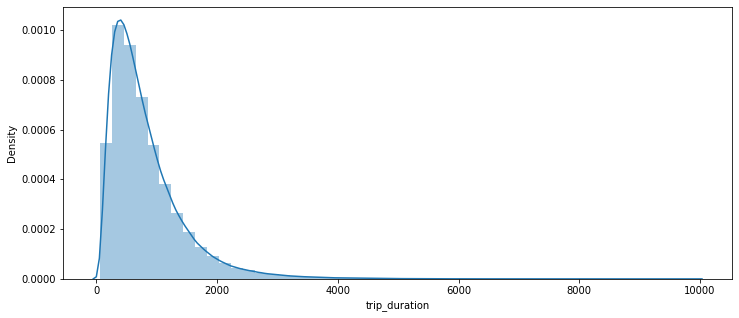

In [ ]:
# Distribution plot of trip distance
plt.figure(figsize = (12,5))
sns.distplot(taxi_df_model['trip_duration'])

We can see that the variable is highly positively skewed. I might log-transform the trip_duration only for linear regression model. Other models are fine with it.


In [ ]:
# Check how much data we've lost
100-taxi_df_model.shape[0]/1458644*100

2.010428864068274

We have accomplished our data cleaning process by losing 2% of data only! Cool! Now let's move towards modeling part.

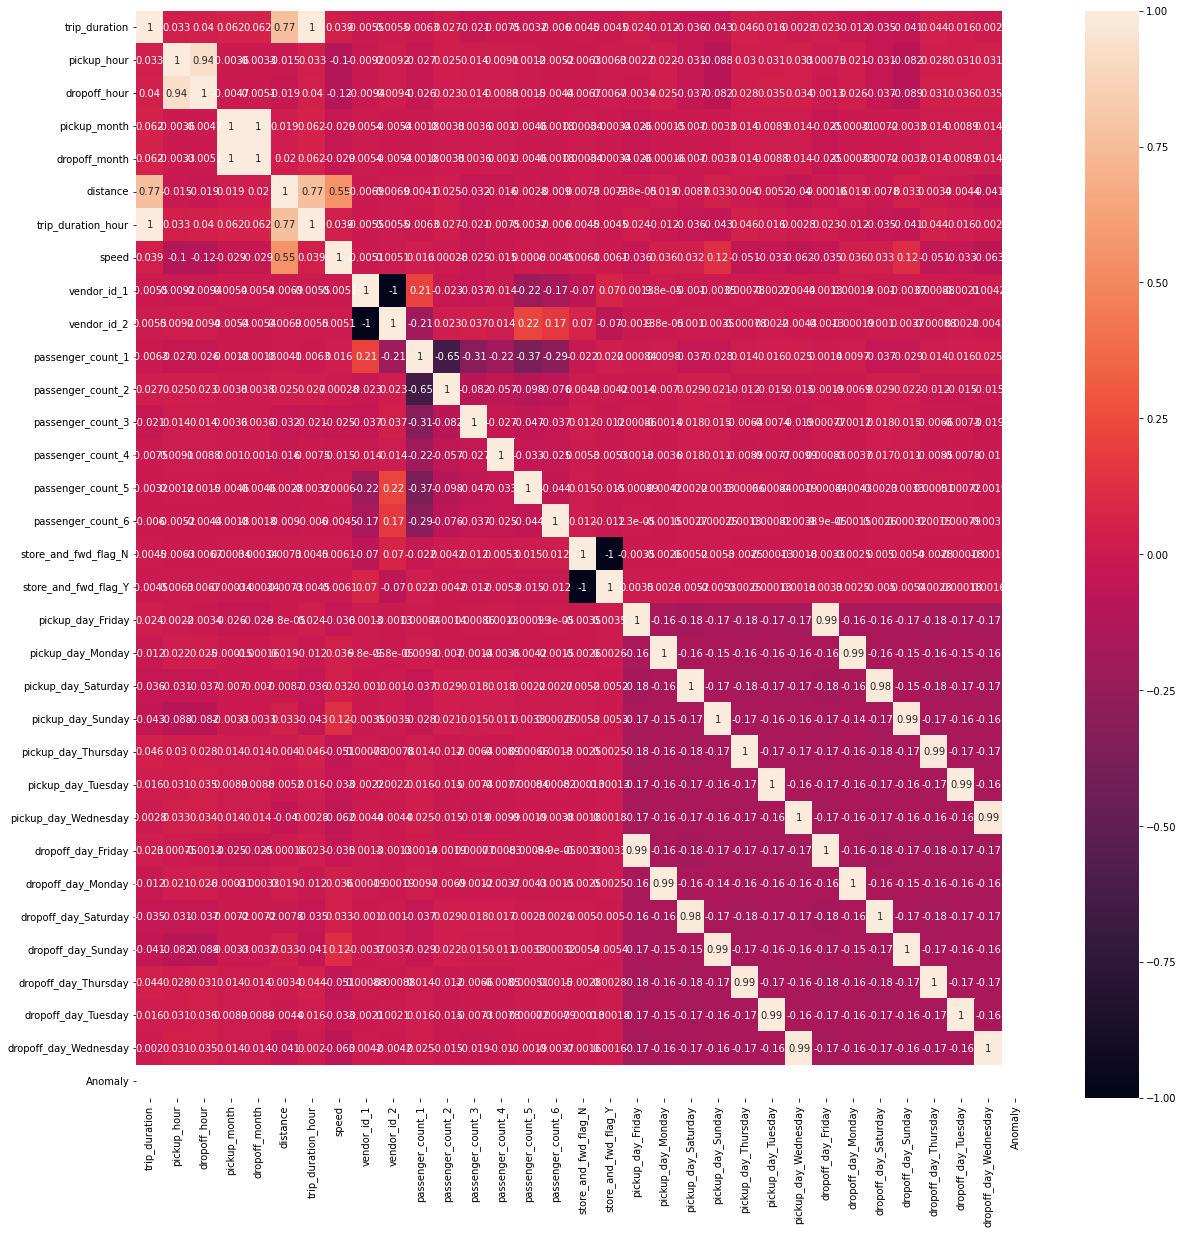

In [ ]:
# Plotting correlation heatmap
corrmat_2 = taxi_df_model.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corrmat_2, annot = True)

We can see that vendor_id and store_and_fwd_flag items have correlation of -1 between their classes. Even we saw that store_and_fwd_flag had N as dominant class. So we can remove store_and_fwd_flag from training set. There are also some highly correlated features which are eventually dummies derived from the original dataset. But let's not remove them as they are important features according to me.

# **3. Model Training :**

Firstly, let's discuss how we are going to proceed. I am discussing my analytical path below in steps:



1.   Scaling the variables.
2.   Splitting the dataset into train-test sets.
3. (Only for Linear Regression) Log-transform trip_duration.
4.   Fit the model.
5.   Evaluate the model.

To do some of these tasks at one go, I am defining a function which will take models and datasets as input and fit the model and show us evaluation metrics. The function will work except for Linear Regression as there are some extra transformations that need to be performed.

In [ ]:
# Define X and y
X = taxi_df_model.drop(['trip_duration', 'trip_duration_hour', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y'], axis = 1)
y = taxi_df_model['trip_duration']

In [ ]:
# Scaling the features
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [ ]:
# Splitting the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

### **1. Linear Regression :**

In [ ]:
# Log transforming the y variable
y1 = np.log10(y)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


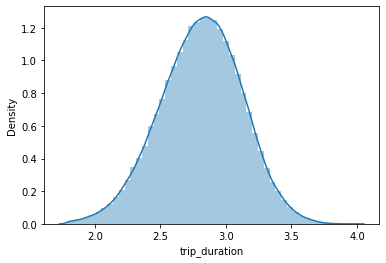

In [ ]:
sns.distplot(y1)

In [ ]:
# Splitting the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train1, y_test1 = train_test_split(X, y1, test_size = 0.2, random_state = 123)

In [ ]:
# Exporting and initiating the Linear Regression model
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train,y_train1)

LinearRegression()

In [ ]:
# Now let's check the model
from sklearn.metrics import mean_squared_error, r2_score
y_pred_train = lin_model.predict(X_train)
y_pred_test = lin_model.predict(X_test)
print(f'The Mean Squared Error (MSE) for training set is : {mean_squared_error(10**(y_train1), 10**(y_pred_train))}')
print(f'The Root Mean Squared Error (RMSE) for training set is : {mean_squared_error(10**(y_train1), 10**(y_pred_train))**0.5}')
print(f'The R2 score for training set is : {r2_score(10**(y_train1), 10**(y_pred_train))}')
print(f'The Mean Squared Error (MSE) for testing set is : {mean_squared_error(10**(y_test1), 10**(y_pred_test))}')
print(f'The Root Mean Squared Error (RMSE) for testing set is : {mean_squared_error(10**(y_test1), 10**(y_pred_test))**0.5}')
print(f'The R2 score for testing set is : {r2_score(10**(y_test1), 10**(y_pred_test))}')

The Mean Squared Error (MSE) for training set is : 18645529.75571323
The Root Mean Squared Error (RMSE) for training set is : 4318.046983963147
The R2 score for training set is : -46.233058168301
The Mean Squared Error (MSE) for testing set is : 10112093.980670217
The Root Mean Squared Error (RMSE) for testing set is : 3179.9518833891525
The R2 score for testing set is : -25.00514705602341


In [ ]:
# Exporting and initiating the Linear Regression model
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Now let's check the model
from sklearn.metrics import mean_squared_error, r2_score
y_pred_train = lin_model.predict(X_train)
y_pred_test = lin_model.predict(X_test)
print(f'The Mean Squared Error (MSE) for training set is : {mean_squared_error(y_train, y_pred_train)}')
print(f'The Root Mean Squared Error (RMSE) for training set is : {mean_squared_error(y_train, y_pred_train)**0.5}')
print(f'The R2 score for training set is : {r2_score(y_train, y_pred_train)}')
print(f'The Mean Squared Error (MSE) for testing set is : {mean_squared_error(y_test, y_pred_test)}')
print(f'The Root Mean Squared Error (RMSE) for testing set is : {mean_squared_error(y_test, y_pred_test)**0.5}')
print(f'The R2 score for testing set is : {r2_score(y_test, y_pred_test)}')

The Mean Squared Error (MSE) for training set is : 77459.39167323158
The Root Mean Squared Error (RMSE) for training set is : 278.31527387700373
The R2 score for training set is : 0.8037790290478659
The Mean Squared Error (MSE) for testing set is : 76168.35600000163
The Root Mean Squared Error (RMSE) for testing set is : 275.9861518265031
The R2 score for testing set is : 0.8041187806816346


Now, this is an interesting picture! Log-transformation ruined the model. Without the transformation, the model gave an r2 score of 0.8 across both sets. And also it predicts trip duration with around 4.5 minutes of error! But the hunger for accuracy shouldn't stop. Let's regularize the model and see how performance changes.

Meanwhile, let's define the function I talked about.

In [ ]:
def model_trainer_tester(model, X_train_func, X_test_func, y_train_func, y_test_func, params = None):
  '''
  This function takes model, training and testing sets and parameter combinations as input
  and gives model performance and best parameters as output
  '''

  # Importing evaluation metrics
  from sklearn.metrics import mean_squared_error, r2_score

  # Conditioning if a parameter set is provided or not
  if params == None:

    # Fitting the model
    model.fit(X_train_func, y_train_func)

    # Prediction on training set
    y_pred_train = model.predict(X_train_func)

    # Prediction on testing set
    y_pred_test = model.predict(X_test_func)

    # Getting and printing evaluation metrics
    print(f'The Mean Squared Error (MSE) for training set is : {mean_squared_error(y_train_func, y_pred_train)}')
    print(f'The Root Mean Squared Error (RMSE) for training set is : {mean_squared_error(y_train_func, y_pred_train)**0.5}')
    print(f'The R2 score for training set is : {r2_score(y_train_func, y_pred_train)}')
    print(f'The Mean Squared Error (MSE) for testing set is : {mean_squared_error(y_test_func, y_pred_test)}')
    print(f'The Root Mean Squared Error (RMSE) for testing set is : {mean_squared_error(y_test_func, y_pred_test)**0.5}')
    print(f'The R2 score for testing set is : {r2_score(y_test_func, y_pred_test)}')
  else:

    # Importing GridSearchCV
    from sklearn.model_selection import GridSearchCV

    # Grid Search on provided parameter sets
    reg_model = GridSearchCV(estimator = model, param_grid = params, scoring = 'r2', cv = 3, verbose = 2)
    reg_model.fit(X_train_func, y_train_func)

    # Getting the optimal model and parameters
    optimal_model = reg_model.best_estimator_
    optimal_model.fit(X_train_func, y_train_func)
    optimal_params = reg_model.best_params_

    # Prediction on training set
    y_pred_train = optimal_model.predict(X_train_func)

    # Prediction on testing set
    y_pred_test = optimal_model.predict(X_test_func)

    # Getting and printing evaluation metrics and best hyperparameters
    print(f'Best hyperparameter combination is : {optimal_params}')
    print(f'The Mean Squared Error (MSE) for training set is : {mean_squared_error(y_train_func, y_pred_train)}')
    print(f'The Root Mean Squared Error (RMSE) for training set is : {mean_squared_error(y_train_func, y_pred_train)**0.5}')
    print(f'The R2 score for training set is : {r2_score(y_train_func, y_pred_train)}')
    print(f'The Mean Squared Error (MSE) for testing set is : {mean_squared_error(y_test_func, y_pred_test)}')
    print(f'The Root Mean Squared Error (RMSE) for testing set is : {mean_squared_error(y_test_func, y_pred_test)**0.5}')
    print(f'The R2 score for testing set is : {r2_score(y_test_func, y_pred_test)}')

### **1.1. Ridge Regularized Linear Regression :**

In [ ]:
from sklearn.linear_model import Ridge
parameters = [{'alpha' : [0.0001, 0.01, 0.1, 1, 5, 10, 100]}]
model_trainer_tester(model = Ridge(), X_train_func = X_train, X_test_func = X_test, y_train_func = y_train, y_test_func = y_test, params = parameters)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] END .......................................alpha=0.0001; total time=   1.0s
[CV] END .......................................alpha=0.0001; total time=   1.0s
[CV] END .......................................alpha=0.0001; total time=   0.9s
[CV] END .........................................alpha=0.01; total time=   0.9s
[CV] END .........................................alpha=0.01; total time=   0.9s
[CV] END .........................................alpha=0.01; total time=   1.4s
[CV] END ..........................................alpha=0.1; total time=   0.6s
[CV] END ..........................................alpha=0.1; total time=   0.6s
[CV] END ..........................................alpha=0.1; total time=   0.6s
[CV] END ............................................alpha=1; total time=   0.6s
[CV] END ............................................alpha=1; total time=   0.6s
[CV] END ........................................

We can see very slight (negligible) improvements here. Let's fit a Lasso Regularization too and see how it performs.

### **1.2. Lasso Regularized Linear Regression :**

In [ ]:
from sklearn.linear_model import Lasso
parameters = [{'alpha' : [0.0001, 0.01, 0.1, 1, 5, 10, 100]}]
model_trainer_tester(model = Lasso(), X_train_func = X_train, X_test_func = X_test, y_train_func = y_train, y_test_func = y_test, params = parameters)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.919e+10, tolerance: 3.019e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END .......................................alpha=0.0001; total time= 1.4min


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.889e+10, tolerance: 3.007e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END .......................................alpha=0.0001; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.879e+10, tolerance: 3.002e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END .......................................alpha=0.0001; total time= 1.2min


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.306e+09, tolerance: 3.019e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END .........................................alpha=0.01; total time= 1.2min


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.313e+09, tolerance: 3.007e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END .........................................alpha=0.01; total time= 1.2min


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.354e+09, tolerance: 3.002e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END .........................................alpha=0.01; total time= 1.1min
[CV] END ..........................................alpha=0.1; total time=  48.2s
[CV] END ..........................................alpha=0.1; total time=  41.3s
[CV] END ..........................................alpha=0.1; total time=  58.5s
[CV] END ............................................alpha=1; total time=   1.7s
[CV] END ............................................alpha=1; total time=   1.6s
[CV] END ............................................alpha=1; total time=   1.8s
[CV] END ............................................alpha=5; total time=   1.1s
[CV] END ............................................alpha=5; total time=   1.1s
[CV] END ............................................alpha=5; total time=   1.1s
[CV] END ...........................................alpha=10; total time=   1.2s
[CV] END ...........................................alpha=10; total time=   1.1s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.348e+10, tolerance: 4.514e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Best hyperparameter combination is : {'alpha': 0.0001}
The Mean Squared Error (MSE) for training set is : 77456.75289377451
The Root Mean Squared Error (RMSE) for training set is : 278.3105332066584
The R2 score for training set is : 0.8037857136326014
The Mean Squared Error (MSE) for testing set is : 76161.68948971755
The Root Mean Squared Error (RMSE) for testing set is : 275.97407394485003
The R2 score for testing set is : 0.8041359248637021


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.348e+10, tolerance: 4.514e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


It seems like Lasso Regularization couldn't converge and stopped due to reaching maximum number of iterations. More or less, we can see that the scores are almost similar to the previous models. Let's try out ElasticNet too.

### **1.3. ElasticNet Regularized Linear Regression :**

In [ ]:
from sklearn.linear_model import ElasticNet
parameters = [{'alpha' : [0.01, 0.1, 1, 10, 100],
               'l1_ratio' : [0.3, 0.6, 0.9]}]
model_trainer_tester(model = ElasticNet(), X_train_func = X_train, X_test_func = X_test, y_train_func = y_train, y_test_func = y_test, params = parameters)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.3; total time=  37.3s
[CV] END ...........................alpha=0.01, l1_ratio=0.3; total time=  38.9s
[CV] END ...........................alpha=0.01, l1_ratio=0.3; total time=  38.2s
[CV] END ...........................alpha=0.01, l1_ratio=0.6; total time=  56.1s
[CV] END ...........................alpha=0.01, l1_ratio=0.6; total time=  56.4s
[CV] END ...........................alpha=0.01, l1_ratio=0.6; total time=  55.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.157e+09, tolerance: 3.019e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.01, l1_ratio=0.9; total time= 1.1min


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.086e+09, tolerance: 3.007e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.01, l1_ratio=0.9; total time= 1.2min


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.543e+09, tolerance: 3.002e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.01, l1_ratio=0.9; total time= 1.2min
[CV] END ............................alpha=0.1, l1_ratio=0.3; total time=   4.8s
[CV] END ............................alpha=0.1, l1_ratio=0.3; total time=   4.3s
[CV] END ............................alpha=0.1, l1_ratio=0.3; total time=   4.5s
[CV] END ............................alpha=0.1, l1_ratio=0.6; total time=   4.4s
[CV] END ............................alpha=0.1, l1_ratio=0.6; total time=   4.4s
[CV] END ............................alpha=0.1, l1_ratio=0.6; total time=   4.4s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=  10.1s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=  10.6s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   9.5s
[CV] END ..............................alpha=1, l1_ratio=0.3; total time=   1.2s
[CV] END ..............................alpha=1, l1_ratio=0.3; total time=   1.3s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.888e+09, tolerance: 4.514e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Best hyperparameter combination is : {'alpha': 0.01, 'l1_ratio': 0.9}
The Mean Squared Error (MSE) for training set is : 77462.20443832896
The Root Mean Squared Error (RMSE) for training set is : 278.3203270304362
The R2 score for training set is : 0.8037719037208197
The Mean Squared Error (MSE) for testing set is : 76159.22534710358
The Root Mean Squared Error (RMSE) for testing set is : 275.9696094628964
The R2 score for testing set is : 0.8041422618687938


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.888e+09, tolerance: 4.514e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


It seems we faced the similar problem here. And scores are also pretty similar too.
##### With that, let's move forward to tree based models!

### **2. Random Forest :**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
parameters = [{'n_estimators' : [30,60],
               'max_depth' : [4,8],
               'min_samples_split' : [1000,5000]}]
model_trainer_tester(model = RandomForestRegressor(n_jobs = -1), X_train_func = X_train, X_test_func = X_test, y_train_func = y_train, y_test_func = y_test, params = parameters)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END max_depth=4, min_samples_split=1000, n_estimators=30; total time= 1.3min
[CV] END max_depth=4, min_samples_split=1000, n_estimators=30; total time= 1.2min
[CV] END max_depth=4, min_samples_split=1000, n_estimators=30; total time= 1.2min
[CV] END max_depth=4, min_samples_split=1000, n_estimators=60; total time= 2.3min
[CV] END max_depth=4, min_samples_split=1000, n_estimators=60; total time= 2.3min
[CV] END max_depth=4, min_samples_split=1000, n_estimators=60; total time= 2.3min
[CV] END max_depth=4, min_samples_split=5000, n_estimators=30; total time= 1.1min
[CV] END max_depth=4, min_samples_split=5000, n_estimators=30; total time= 1.1min
[CV] END max_depth=4, min_samples_split=5000, n_estimators=30; total time= 1.1min
[CV] END max_depth=4, min_samples_split=5000, n_estimators=60; total time= 2.3min
[CV] END max_depth=4, min_samples_split=5000, n_estimators=60; total time= 2.3min
[CV] END max_depth=4, min_samples_spli

Holy cow! We got an r2 score of 0.986 across both sets. I could've classified it as an overfit model if the test score too wasn't the same! The model can predict trip duration with approx 1 minutes of error. Looks like we've built a very good (maybe best) model! But it was too time consuming in nature. (It took me 1 hour and 10 minutes too run this code. Boring, right? Also the share of optimum model training is approx 14 minutes.)

##### I don't think any model could perform better than this. But still, let's get on with the other models too.

In [ ]:
taxi_df_model.to_csv('/content/drive/MyDrive/NYC Taxi Trip Time Prediction - Subhajit Ganguly/taxi_df_model.csv')

In [ ]:
taxi_df_model = pd.read_csv('/content/drive/MyDrive/NYC Taxi Trip Time Prediction - Subhajit Ganguly/taxi_df_model.csv', index_col = 'id')

###**3. Gradient Boosting Machine :**

I am going to fit GBM only for the best parameter sets of Random Forest as GBM is far more time consuming than Random Forest. Let's see what happens.

In [ ]:
# I am curbing the parameters a bit to save my time.
from sklearn.ensemble import GradientBoostingRegressor
model_trainer_tester(model = GradientBoostingRegressor(max_depth = 8, min_samples_split = 1000, n_estimators = 60), X_train_func = X_train, X_test_func = X_test, y_train_func = y_train, y_test_func = y_test)

The Mean Squared Error (MSE) for training set is : 93.18217322573778
The Root Mean Squared Error (RMSE) for training set is : 9.653091381818458
The R2 score for training set is : 0.9997639499083221
The Mean Squared Error (MSE) for testing set is : 122.35652996423335
The Root Mean Squared Error (RMSE) for testing set is : 11.061488596216757
The R2 score for testing set is : 0.9996853372248056


Okay! GBM was an improvement on Random Forest. It almost gives an r2 score of 0.99 and can predict trip durations with approx 10-11 seconds of error. That's unbelievable right? But the time taken was almost double of Random Forest. Now, let's fit a SVM algorithm.


### **4. SVM :**


In [ ]:
from sklearn.svm import SVR
parameters = [{'C' : [10000, 100000, 1000000]}]
model_trainer_tester(model = SVR(max_iter = 1000), X_train_func = X_train, X_test_func = X_test, y_train_func = y_train, y_test_func = y_test, params = parameters)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ............................................C=10000; total time= 3.2min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ............................................C=10000; total time= 3.2min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ............................................C=10000; total time= 3.2min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ...........................................C=100000; total time= 3.0min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ...........................................C=100000; total time= 3.1min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ...........................................C=100000; total time= 3.0min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ..........................................C=1000000; total time= 2.7min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ..........................................C=1000000; total time= 2.8min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ..........................................C=1000000; total time= 2.7min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Best hyperparameter combination is : {'C': 10000}
The Mean Squared Error (MSE) for training set is : 178145.77411115135
The Root Mean Squared Error (RMSE) for training set is : 422.07318572867354
The R2 score for training set is : 0.5487191932183773
The Mean Squared Error (MSE) for testing set is : 177285.86220306592
The Root Mean Squared Error (RMSE) for testing set is : 421.05327715511953
The R2 score for testing set is : 0.5440761402774201
